# Entity Resolution project @ Wavestone
## Entity Matching

> *Datasets information from [here](https://data.dws.informatik.uni-mannheim.de/benchmarkmatchingtasks/index.html)*

> **Tristan PERROT**


## Run results

In [ ]:
!python result_sberts.py

Using device: cuda
/home/jovyan/.local/lib/python3.10/site-packages/transformers/utils/hub.py:128: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/opt/conda/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
2025-01-22 11:16:35.574847: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF

## Import libraries

In [1]:
import os

while 'model' not in os.listdir():
    os.chdir('..')

In [2]:
import re
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

from model.utils import load_data
import result_sberts
import import_data

Using device: cuda


/home/jovyan/.local/lib/python3.10/site-packages/transformers/utils/hub.py:128: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/opt/conda/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
2025-01-30 15:59:55.701104: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS

In [3]:
print('Available models:')
print(result_sberts.MODELS)
print()
print('Available datasets:')
print(result_sberts.DATA_NAMES)

Available models:
['cross-encoder/stsb-roberta-base', 'cross-encoder/stsb-distilroberta-base', 'cross-encoder/ms-marco-MiniLM-L-12-v2']

Available datasets:
['fodors-zagats', 'amazon-google', 'abt-buy']


## Amazon-Google

In [4]:
data_name = 'amazon-google'

table_a_serialized, table_b_serialized, X_train_ids, y_train, X_valid_ids, y_valid, X_test_ids, y_test = load_data(os.path.join(import_data.DATA_FOLDER, data_name))

Table A columns:
    column_name data_example
1   description          NaN
2  manufacturer   broderbund
3         price          0.0 

Table B columns:
    column_name              data_example
1   description  learning quickbooks 2007
2  manufacturer                    intuit
3         price                     38.99 

Serialized entities 



In [5]:
preds = {}
results_dict = {}
for data_name in result_sberts.DATA_NAMES:
    results_dict[data_name] = {}
    table_a_serialized, table_b_serialized, X_train_ids, y_train, X_valid_ids, y_valid, X_test_ids, y_test = load_data(os.path.join(import_data.DATA_FOLDER, data_name))
    for model_name in result_sberts.MODELS:
        results_dict[data_name][model_name] = {}
        for order_cols in result_sberts.LOAD_OPTIONS['order_cols']:
            results_dict[data_name][model_name][order_cols] = {}
            for remove_col_names in result_sberts.LOAD_OPTIONS['remove_col_names']:
                dir_name = f'{data_name}-{model_name}-order_cols_{order_cols}-remove_col_names_{remove_col_names}'
                logits = pd.read_csv(os.path.join('results', dir_name, 'logits.csv'), names=['idA', 'idB', 'pred'])
                results_dict[data_name][model_name][order_cols][remove_col_names] = {}
                results_dict[data_name][model_name][order_cols][remove_col_names]['precision'] = precision_score(y_test, logits['pred'].values > result_sberts.threshold)
                results_dict[data_name][model_name][order_cols][remove_col_names]['recall'] = recall_score(y_test, logits['pred'].values > result_sberts.threshold)
                results_dict[data_name][model_name][order_cols][remove_col_names]['f1'] = f1_score(y_test, logits['pred'].values > result_sberts.threshold)
                results_dict[data_name][model_name][order_cols][remove_col_names]['roc_auc'] = roc_auc_score(y_test, logits['pred'].values)
                results_dict[data_name][model_name][order_cols][remove_col_names]['accuracy'] = accuracy_score(y_test, logits['pred'].values > result_sberts.threshold)
                results_dict[data_name][model_name][order_cols][remove_col_names]['confusion_matrix'] = confusion_matrix(y_test, logits['pred'].values > result_sberts.threshold)
                fpr, tpr, _ = roc_curve(y_test, logits['pred'].values)
                results_dict[data_name][model_name][order_cols][remove_col_names]['roc_curve'] = (fpr, tpr, auc(fpr, tpr))
                results_dict[data_name][model_name][order_cols][remove_col_names]['logits'] = logits

Table A columns:
  column_name              data_example
1        addr  '435 s. la cienega blv.'
2        city             'los angeles'
3       phone              310/246-1501
4        type                  american 

Table B columns:
  column_name           data_example
1        addr  '10801 w. pico blvd.'
2        city              'west la'
3       phone           310-475-3585
4        type               american 

Serialized entities 

Table A columns:
    column_name data_example
1   description          NaN
2  manufacturer   broderbund
3         price          0.0 

Table B columns:
    column_name              data_example
1   description  learning quickbooks 2007
2  manufacturer                    intuit
3         price                     38.99 

Serialized entities 

Table A columns:
   column_name                                       data_example
1  description  Sony Turntable - PSLX350H/ Belt Drive System/ ...
2        price                                                

In [6]:
for data_name, models in results_dict.items():
    best_f1 = 0
    best_option = None
    for model_name, orders in models.items():
        for order_cols, removes in orders.items():
            for remove_col_names, metrics in removes.items():
                if metrics['f1'] > best_f1:
                    best_f1 = metrics['f1']
                    best_option = (model_name, order_cols, remove_col_names)
    print(f"Dataset: {data_name}, Best F1 Score: {best_f1}, Options: {best_option}")

Dataset: fodors-zagats, Best F1 Score: 1.0, Options: ('cross-encoder/stsb-roberta-base', True, True)
Dataset: amazon-google, Best F1 Score: 0.9034749034749034, Options: ('cross-encoder/stsb-roberta-base', False, True)
Dataset: abt-buy, Best F1 Score: 0.9488372093023256, Options: ('cross-encoder/stsb-roberta-base', False, False)


In [7]:
for data_name, models in results_dict.items():
    for model_name, orders in models.items():
        for order_cols, removes in orders.items():
            for remove_col_names, metrics in removes.items():
                print(f"Dataset: {data_name}, Model: {model_name}, Order Cols: {order_cols}, Remove Col Names: {remove_col_names}")
                print(f"Precision: {metrics['precision']}")
                print(f"Recall: {metrics['recall']}")
                print(f"F1: {metrics['f1']}")
                print(f"ROC AUC: {metrics['roc_auc']}")
                print(f"Accuracy: {metrics['accuracy']}")
                print(f"Confusion Matrix: {metrics['confusion_matrix']}")
                print()

Dataset: fodors-zagats, Model: cross-encoder/stsb-roberta-base, Order Cols: True, Remove Col Names: True
Precision: 1.0
Recall: 1.0
F1: 1.0
ROC AUC: 1.0
Accuracy: 1.0
Confusion Matrix: [[55  0]
 [ 0 11]]

Dataset: fodors-zagats, Model: cross-encoder/stsb-roberta-base, Order Cols: True, Remove Col Names: False
Precision: 1.0
Recall: 1.0
F1: 1.0
ROC AUC: 1.0
Accuracy: 1.0
Confusion Matrix: [[55  0]
 [ 0 11]]

Dataset: fodors-zagats, Model: cross-encoder/stsb-roberta-base, Order Cols: False, Remove Col Names: True
Precision: 1.0
Recall: 1.0
F1: 1.0
ROC AUC: 1.0
Accuracy: 1.0
Confusion Matrix: [[55  0]
 [ 0 11]]

Dataset: fodors-zagats, Model: cross-encoder/stsb-roberta-base, Order Cols: False, Remove Col Names: False
Precision: 1.0
Recall: 1.0
F1: 1.0
ROC AUC: 1.0
Accuracy: 1.0
Confusion Matrix: [[55  0]
 [ 0 11]]

Dataset: fodors-zagats, Model: cross-encoder/stsb-distilroberta-base, Order Cols: True, Remove Col Names: True
Precision: 1.0
Recall: 1.0
F1: 1.0
ROC AUC: 1.0
Accuracy: 1.0
Con

## Visualisation

### 1. Bar Chart for Model Comparison

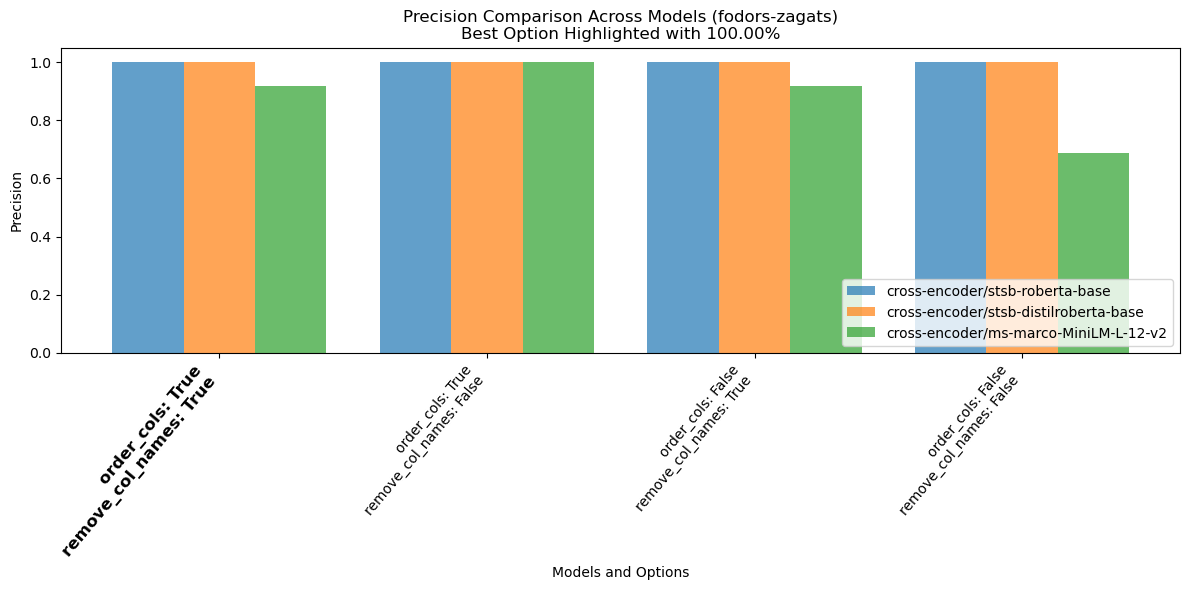

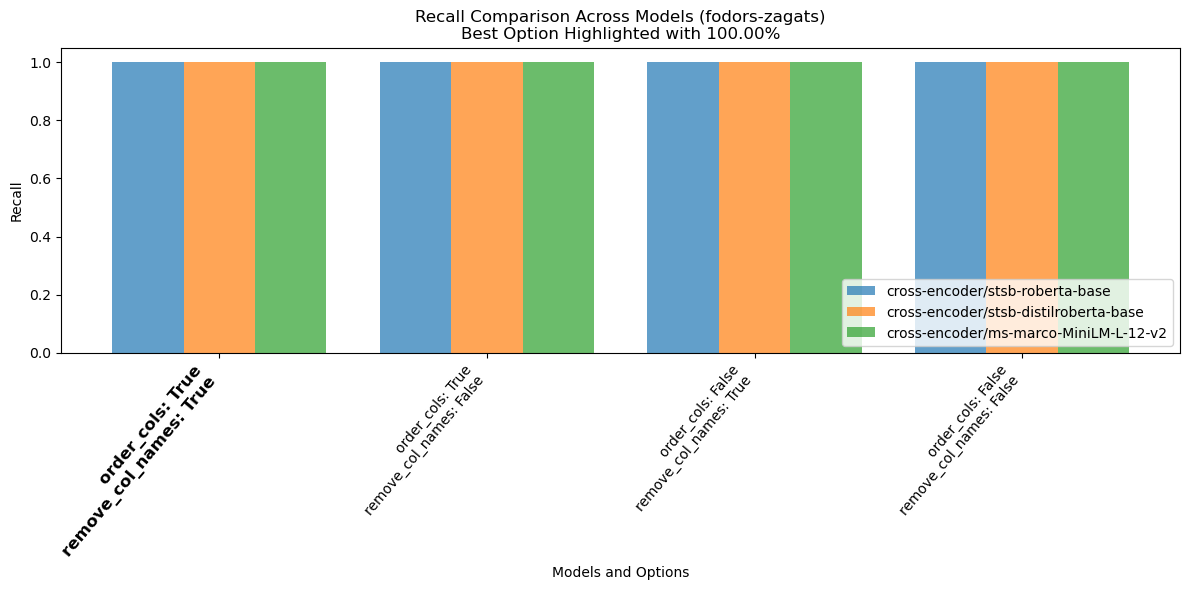

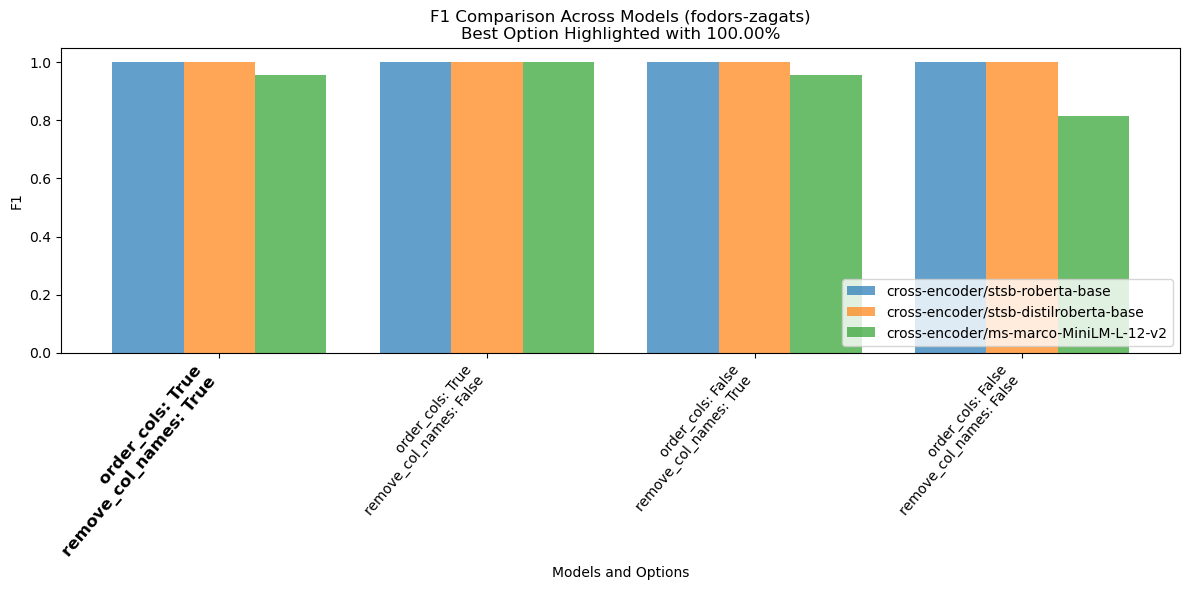

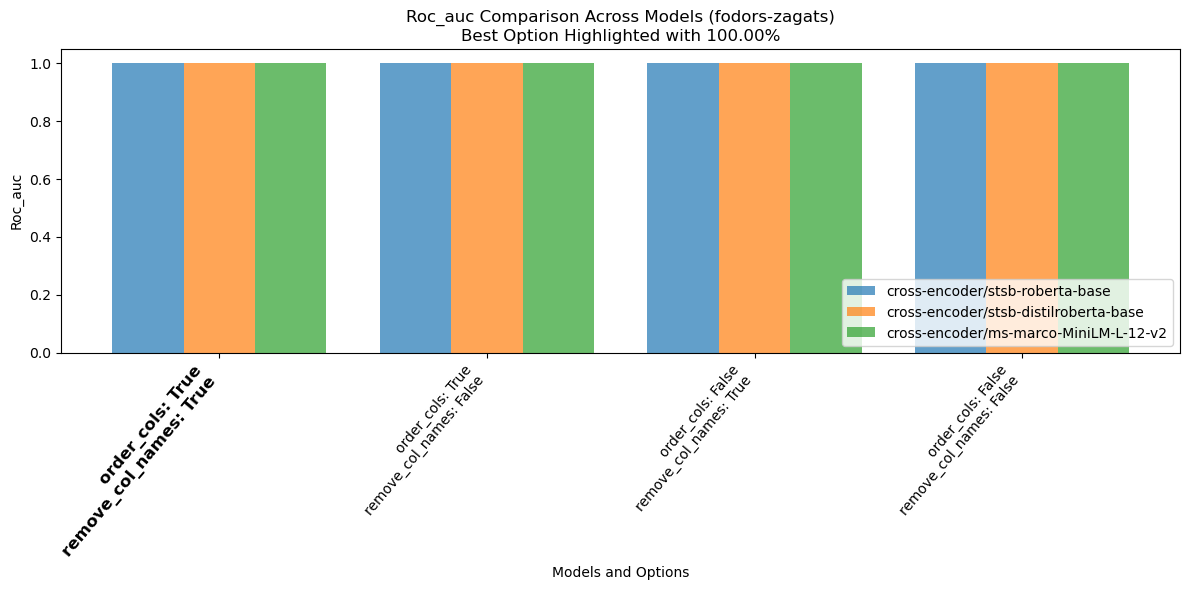

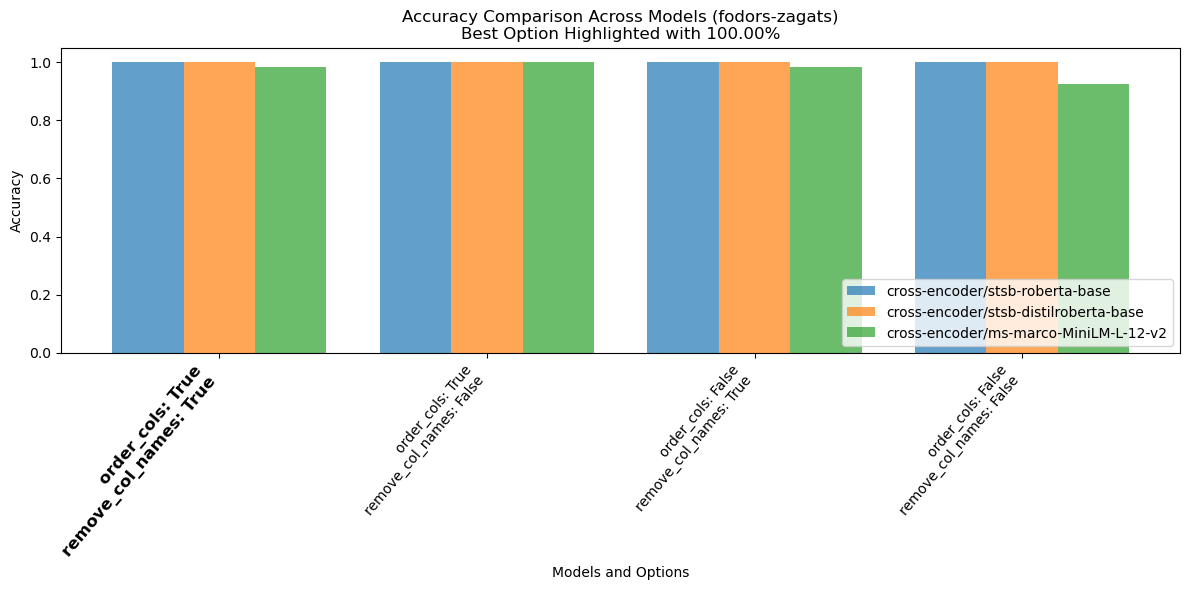

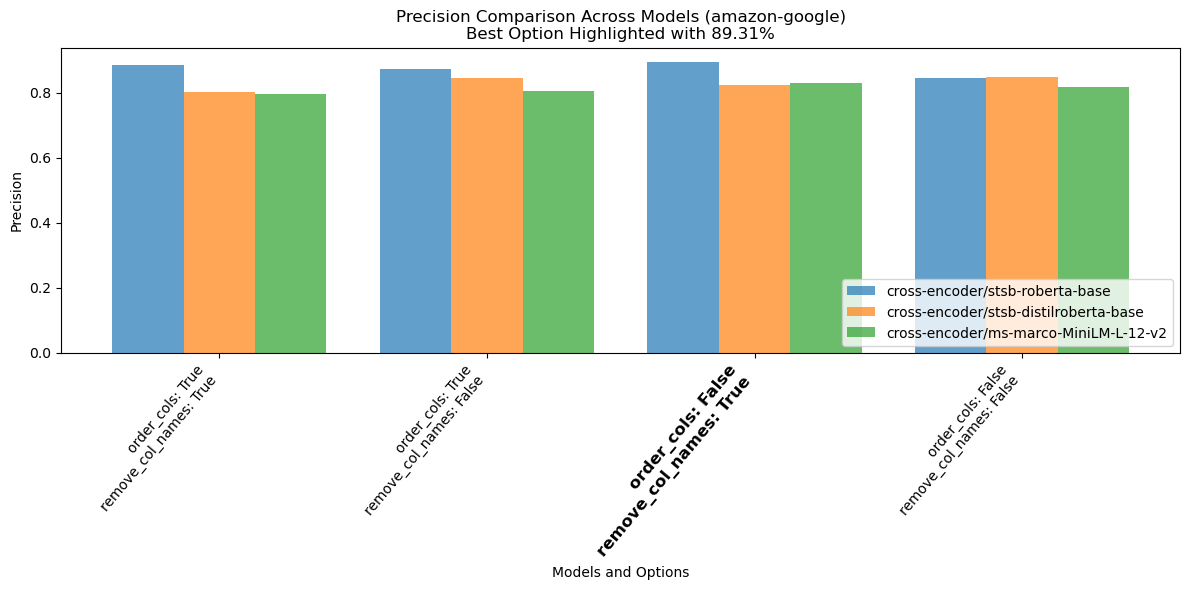

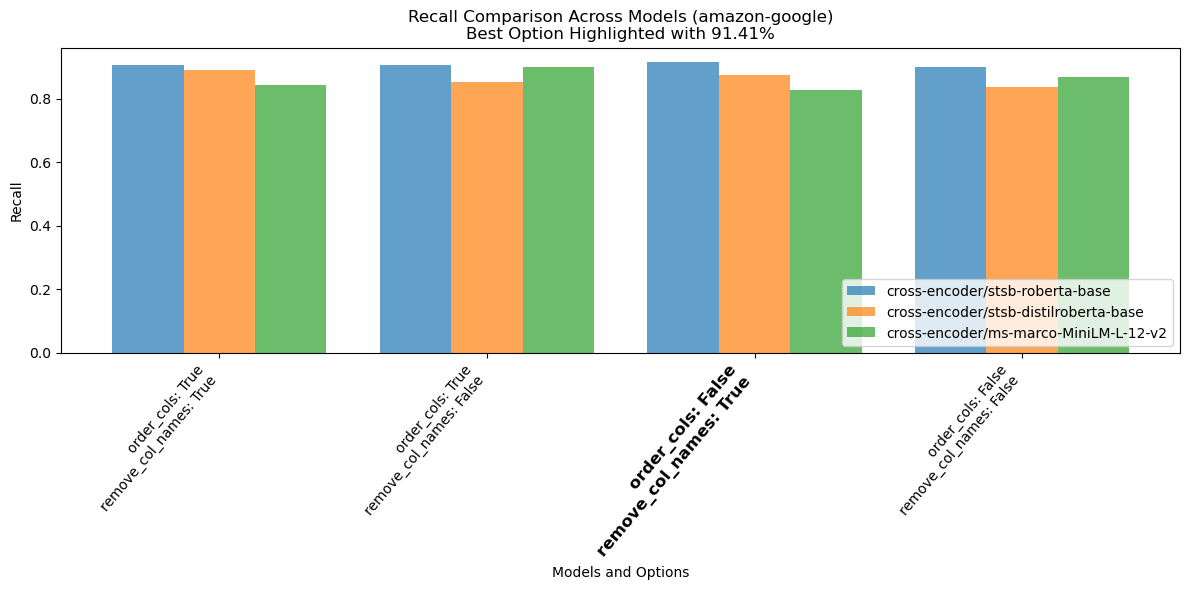

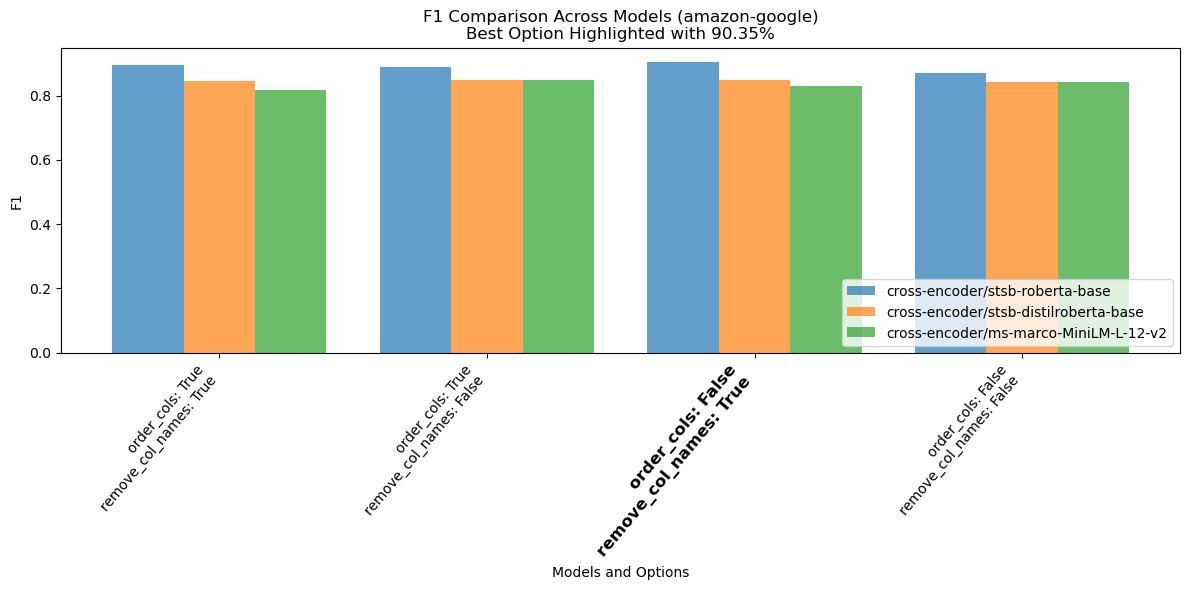

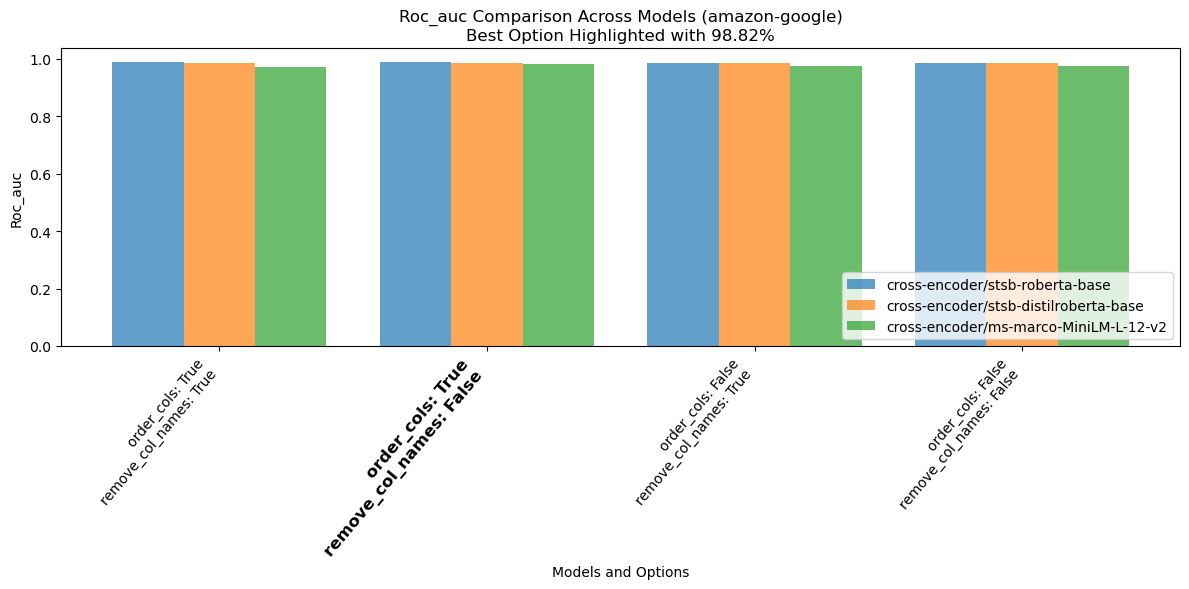

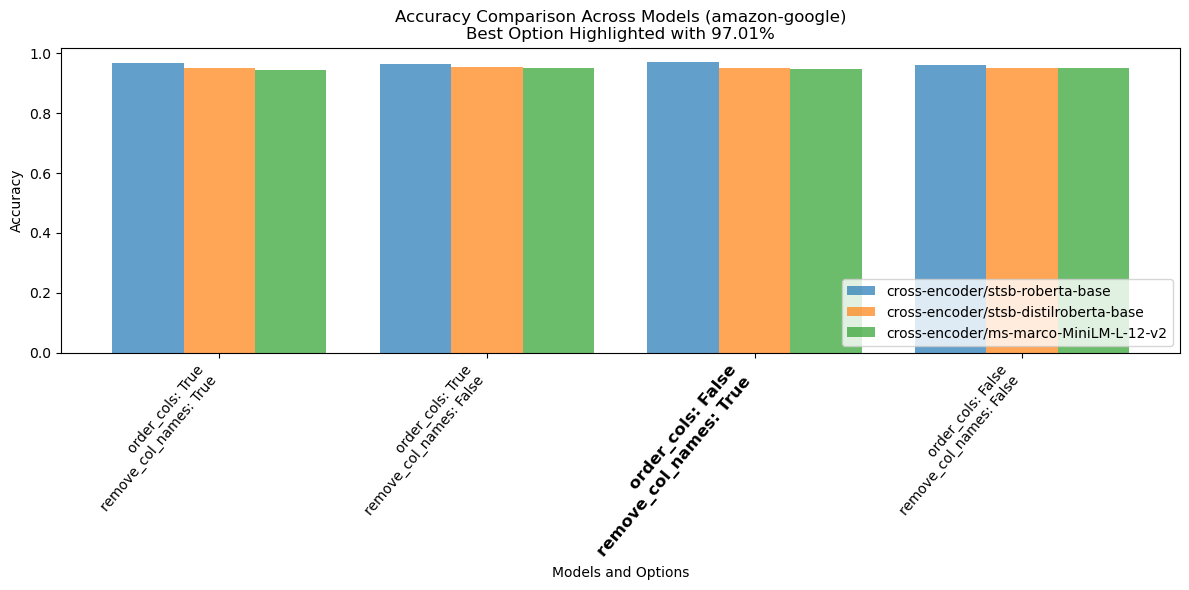

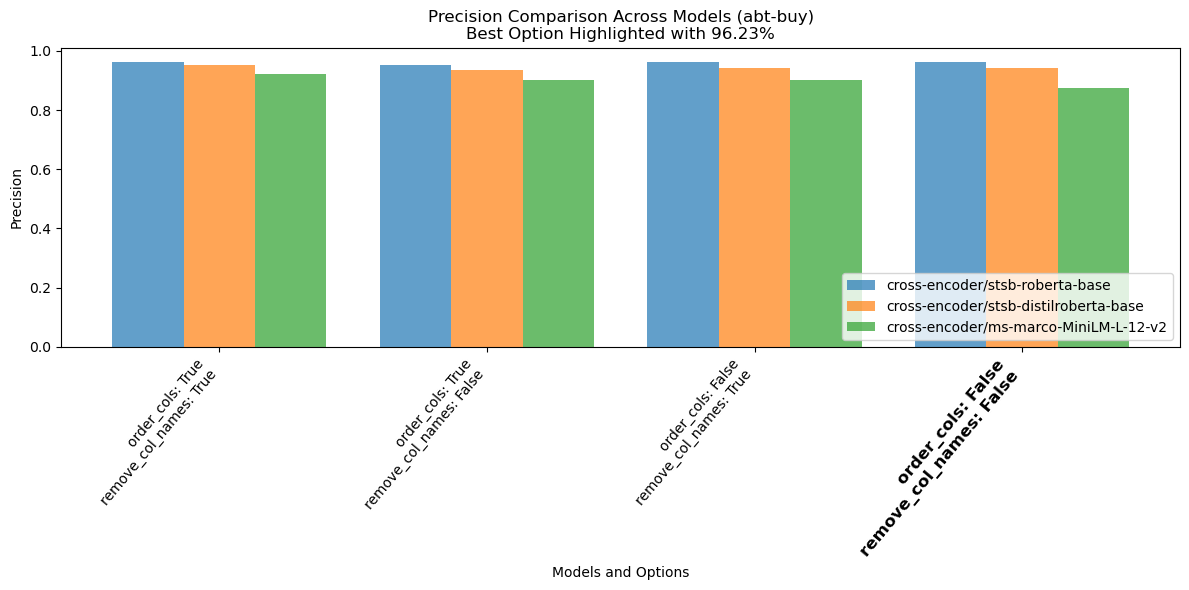

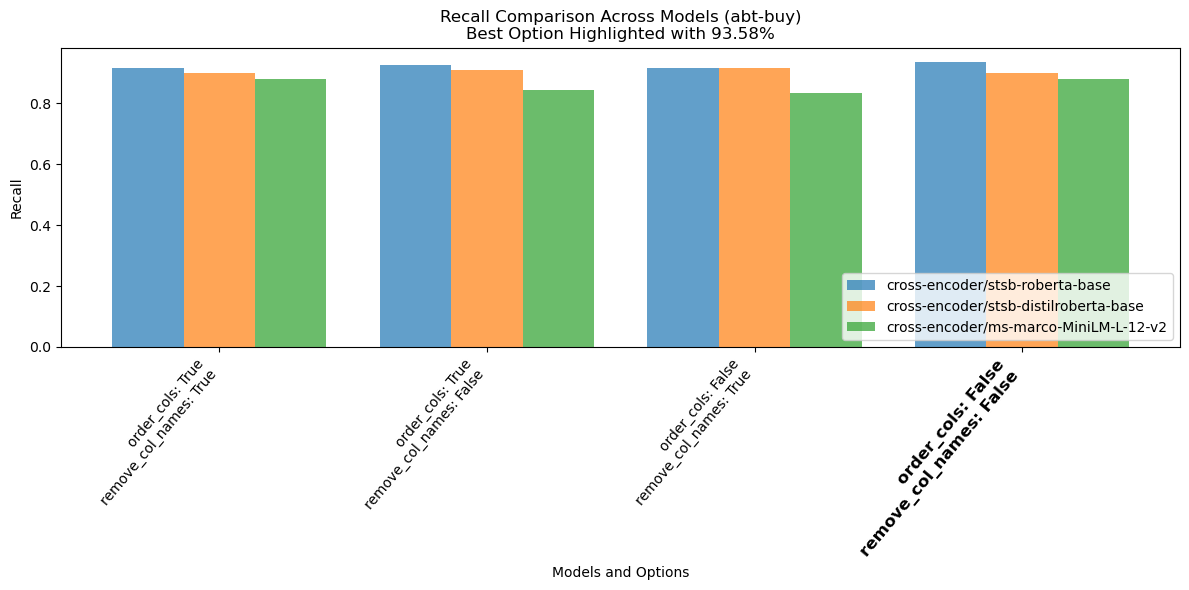

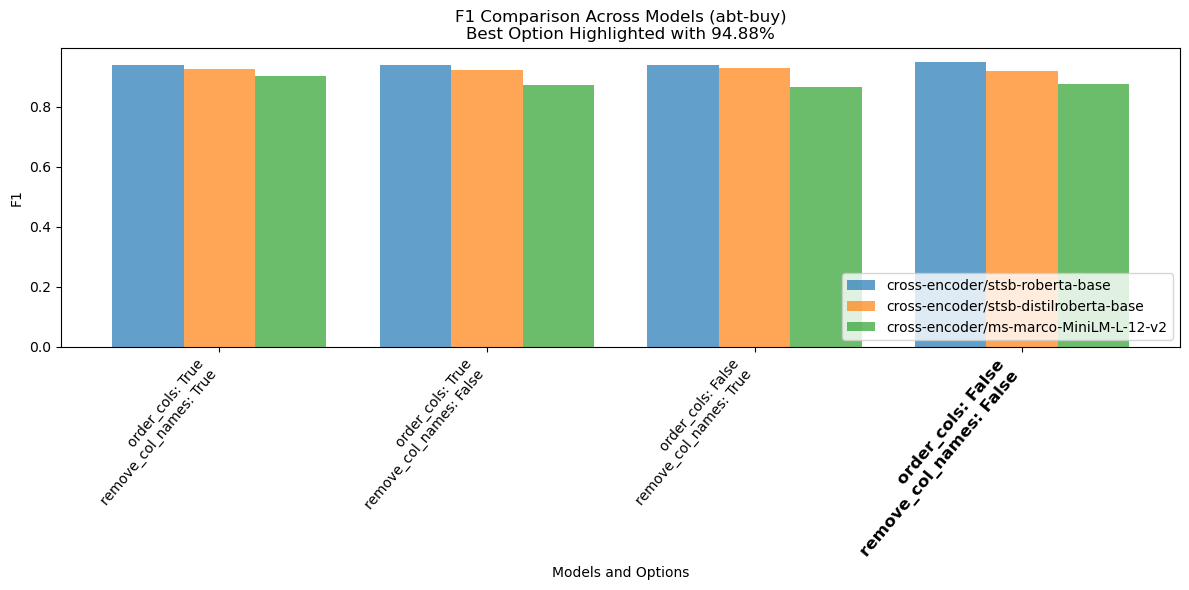

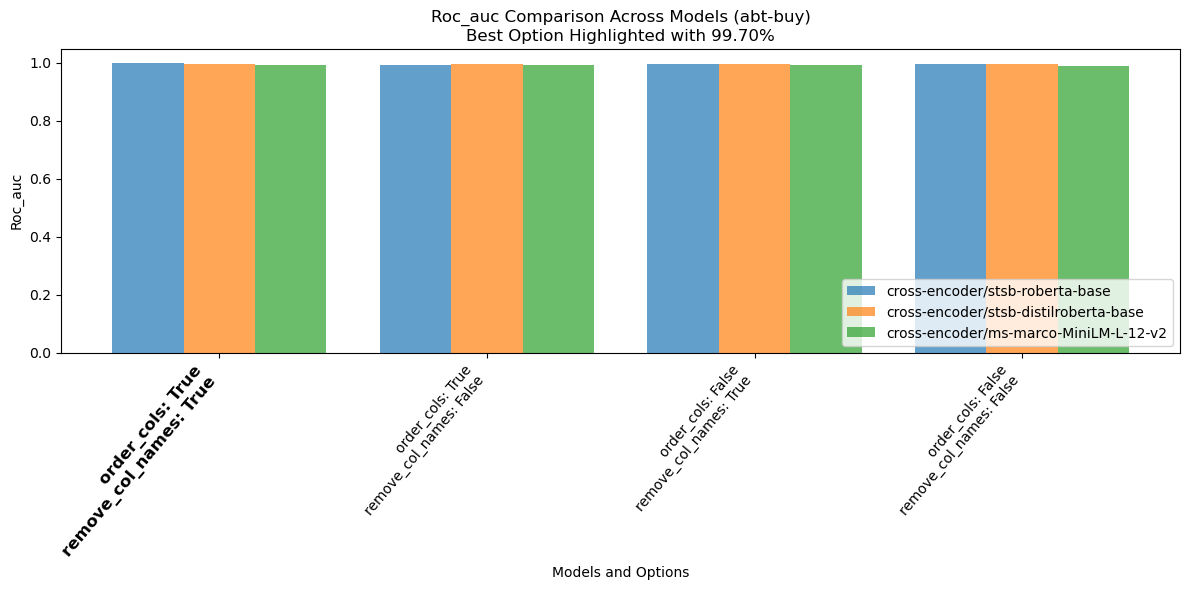

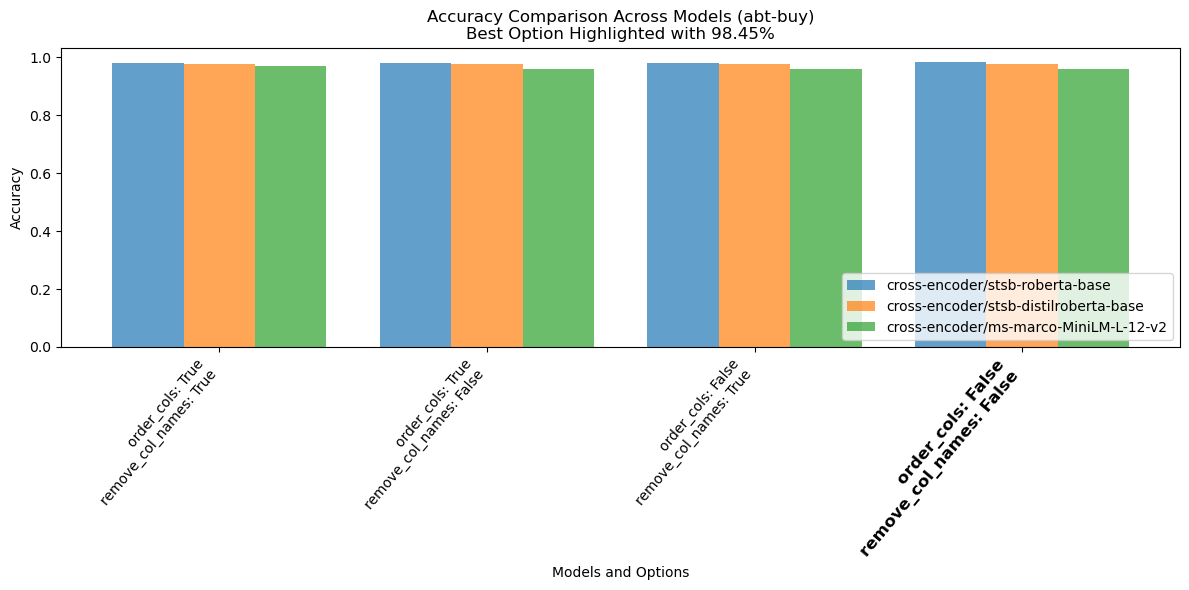

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Extracting data
metrics_list = ['precision', 'recall', 'f1', 'roc_auc', 'accuracy']
datasets = results_dict.keys()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

for data_name in datasets:
    for metric in metrics_list:
        fig, ax = plt.subplots(figsize=(12, 6))
        model_names = list(results_dict[data_name].keys())
        num_models = len(model_names)
        values = [[] for _ in range(num_models)]
        labels = []
        color_map = []
        for model_idx, model_name in enumerate(model_names):
            for order_cols in results_dict[data_name][model_name].keys():
                for remove_col_names in results_dict[data_name][model_name][order_cols].keys():
                    if model_idx == 0:
                        labels.append(f"order_cols: {order_cols}\nremove_col_names: {remove_col_names}")
                    values[model_idx].append(results_dict[data_name][model_name][order_cols][remove_col_names][metric])
                    color_map.append(colors[model_idx % len(colors)])
        
        x = np.arange(len(labels))
        bar_width = 0.8 / num_models  # Adjust the width of the bars
        for i in range(num_models):
            ax.bar(x + i * bar_width, values[i], bar_width, color=colors[i % len(colors)], alpha=0.7, label=model_names[i])
        
        ax.set_xticks(x + bar_width * (num_models - 1) / 2)
        ax.set_xticklabels(labels, rotation=50, ha='right')
        ax.set_title(f"{metric.capitalize()} Comparison Across Models ({data_name})\nBest Option Highlighted with {max(max(values)):.2%}")
        ax.set_xlabel("Models and Options")
        ax.set_ylabel(metric.capitalize())
        ax.legend(loc='lower right')
        
        # Highlight the best option
        best_option_idx = np.argmax([max(values[i]) for i in range(num_models)])
        best_label_idx = np.argmax(values[best_option_idx])
        ax.get_xticklabels()[best_label_idx].set_fontweight('bold')
        ax.get_xticklabels()[best_label_idx].set_fontsize(12)
        
        plt.tight_layout()
        plt.show()


### 2. Confusion Matrix Heatmap

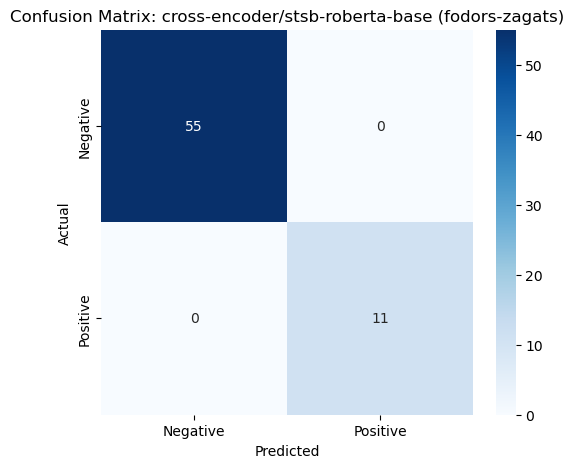

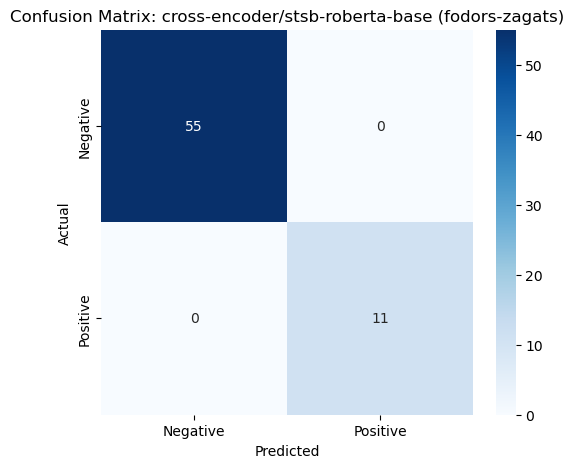

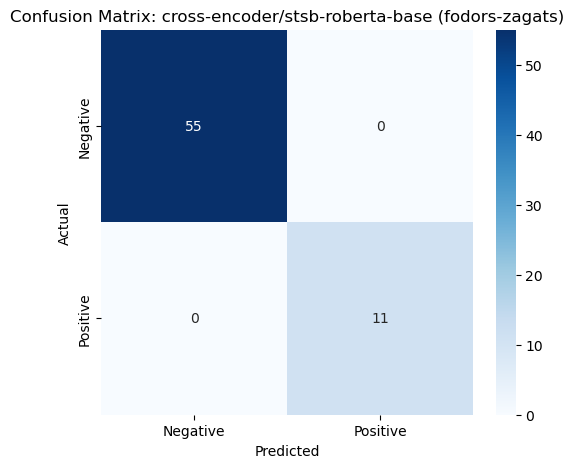

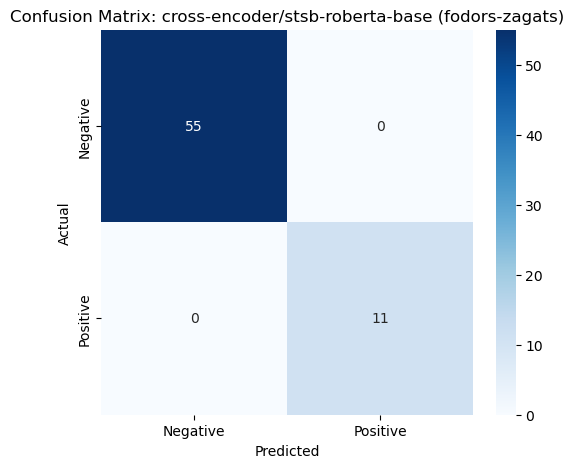

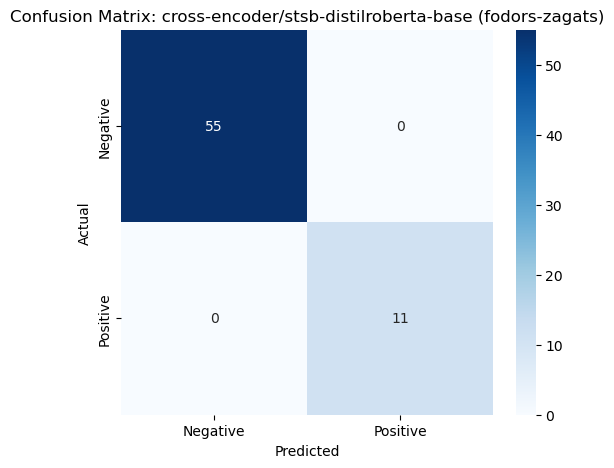

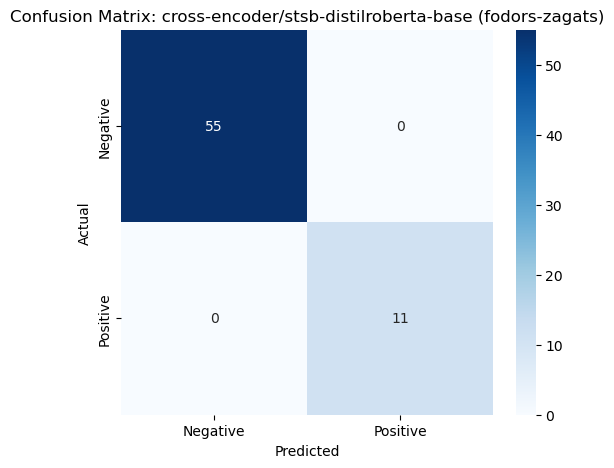

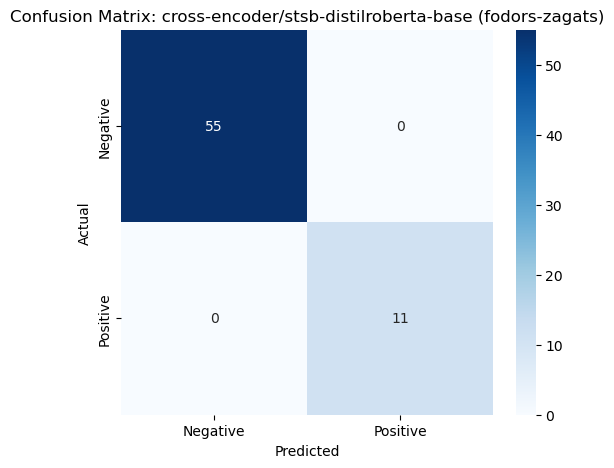

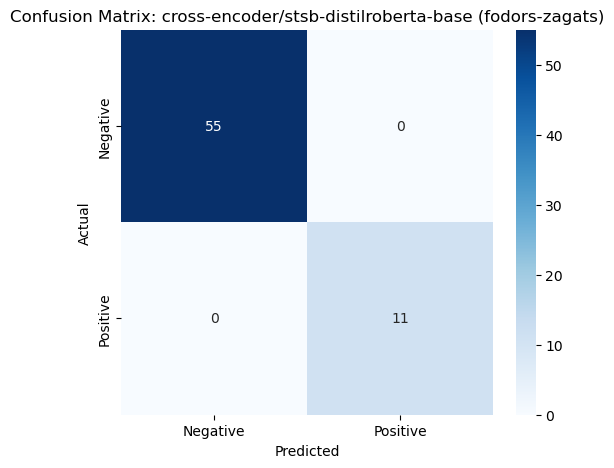

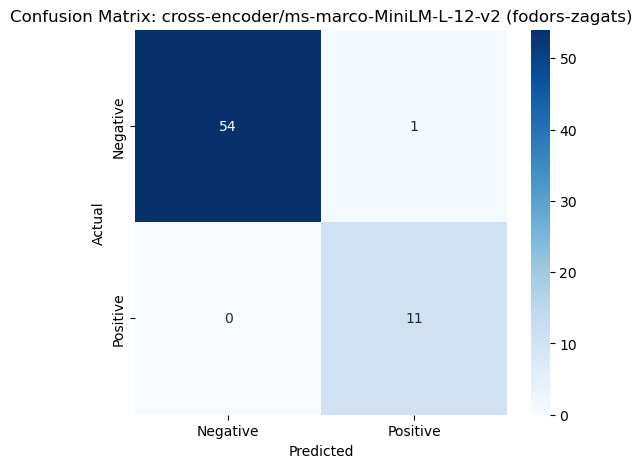

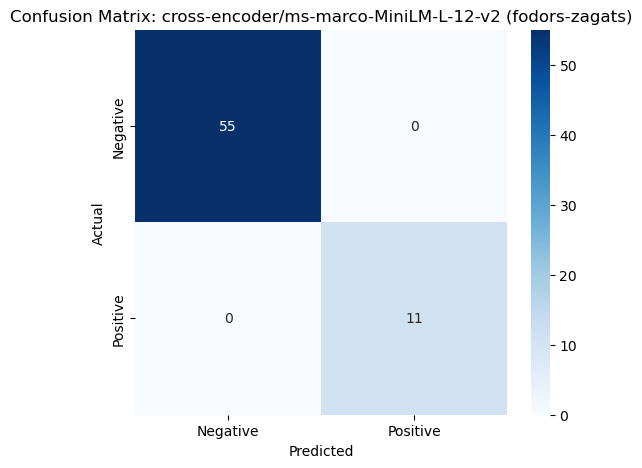

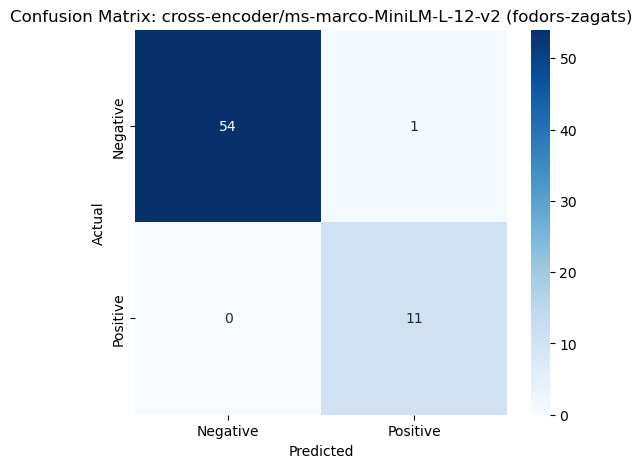

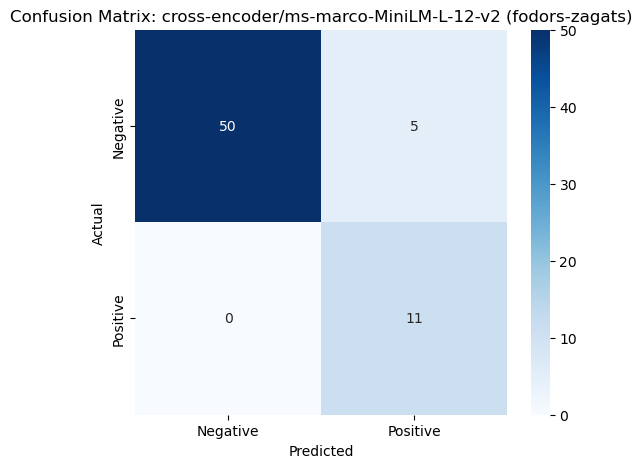

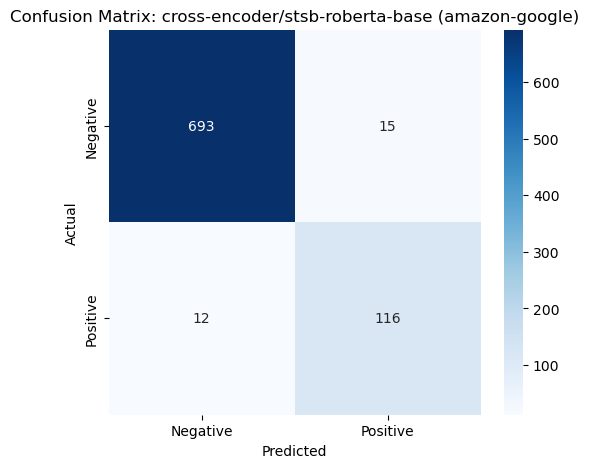

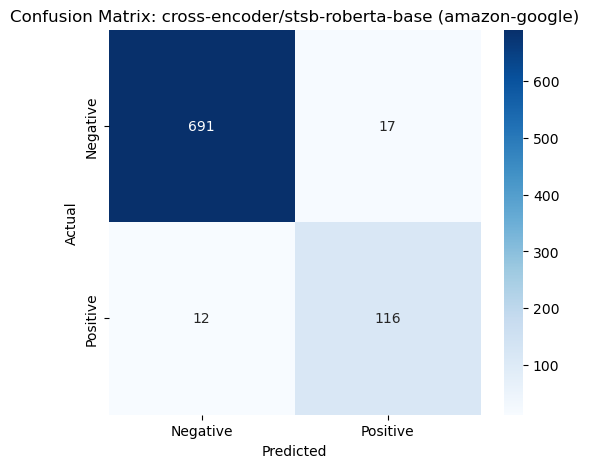

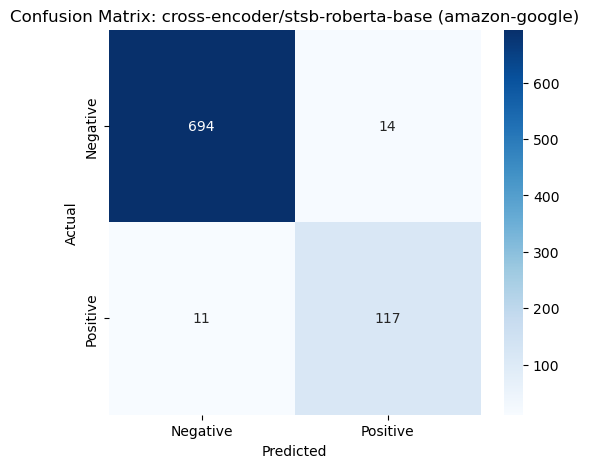

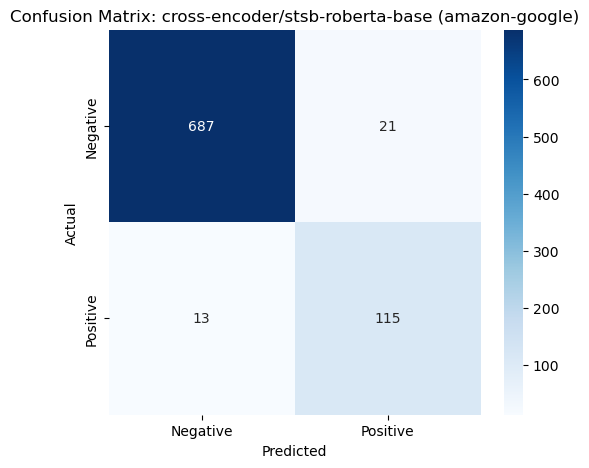

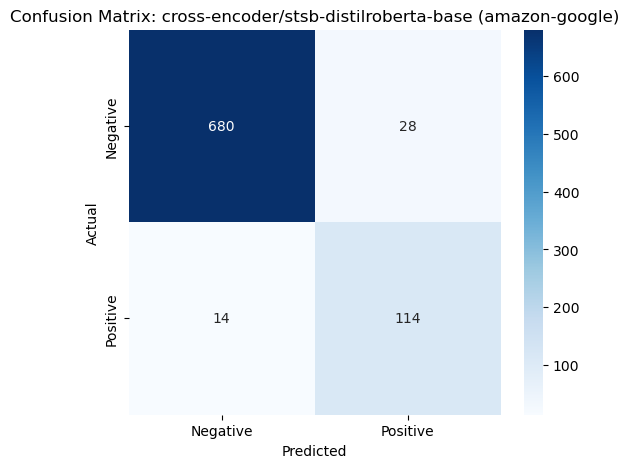

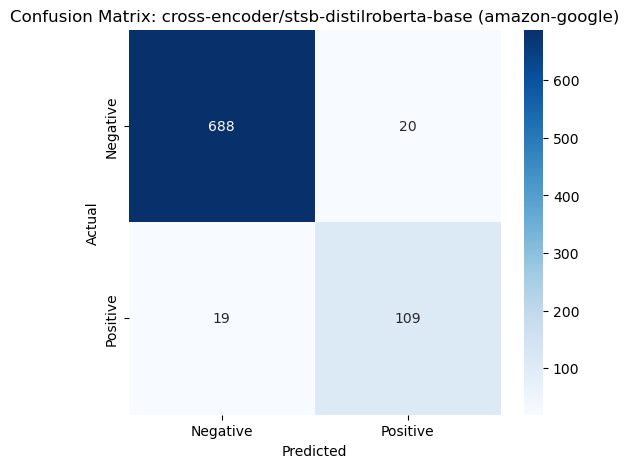

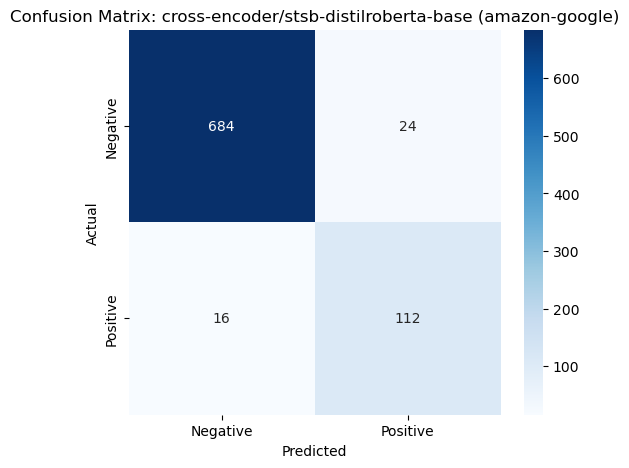

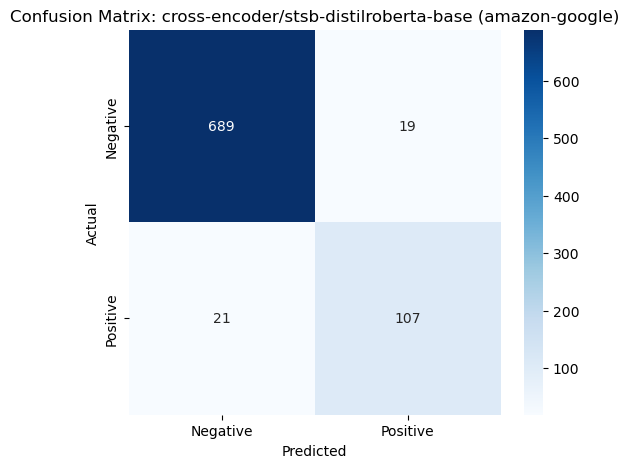

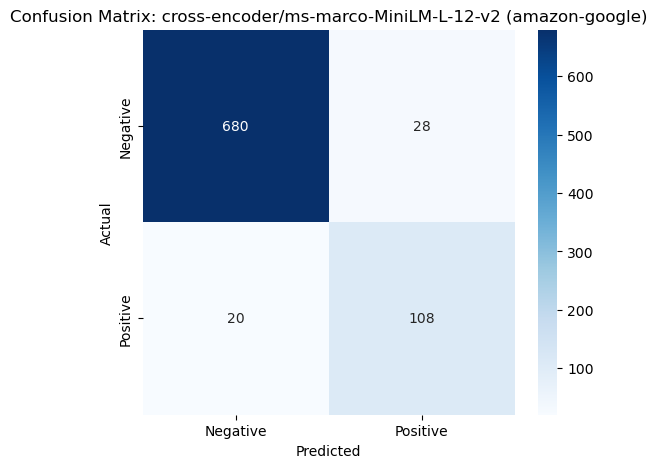

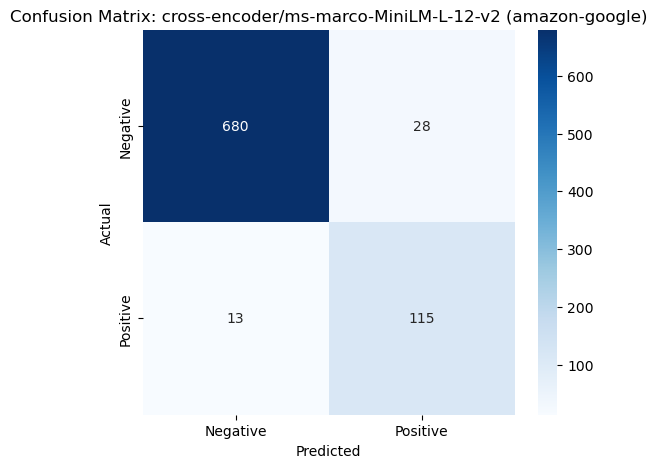

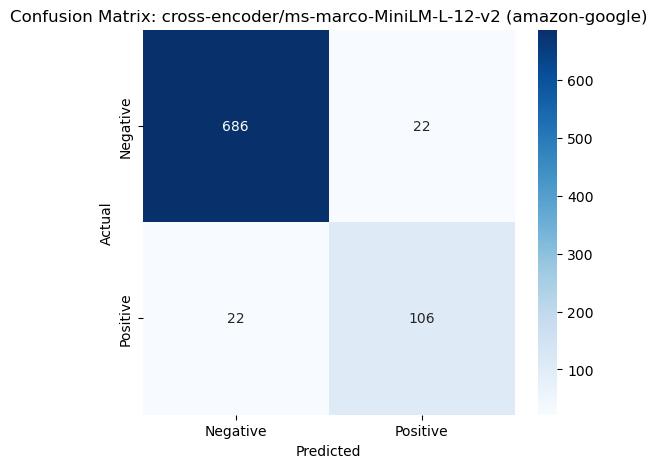

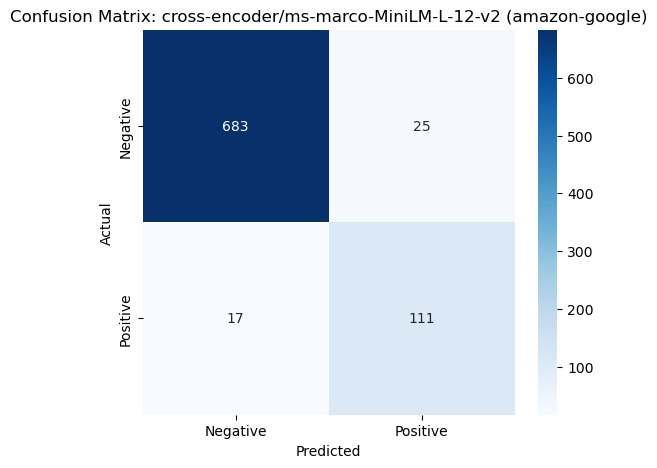

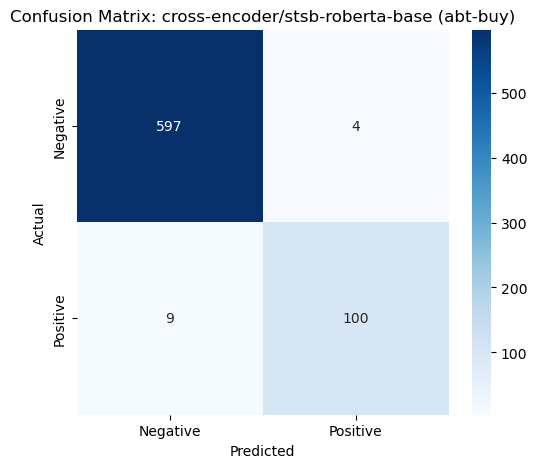

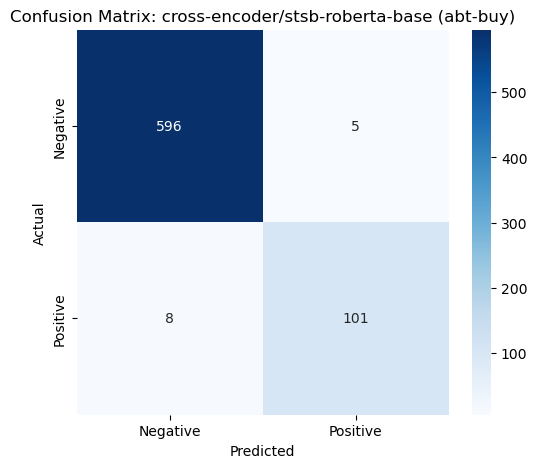

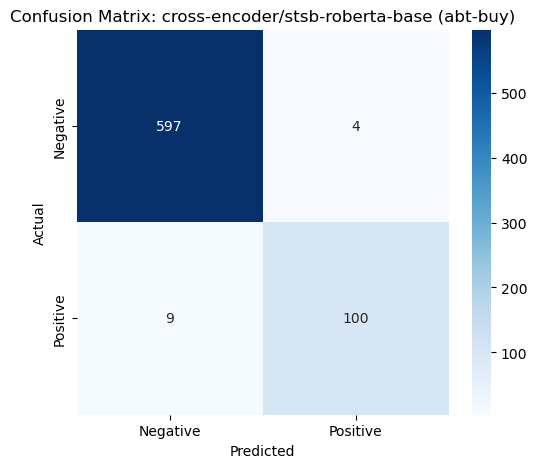

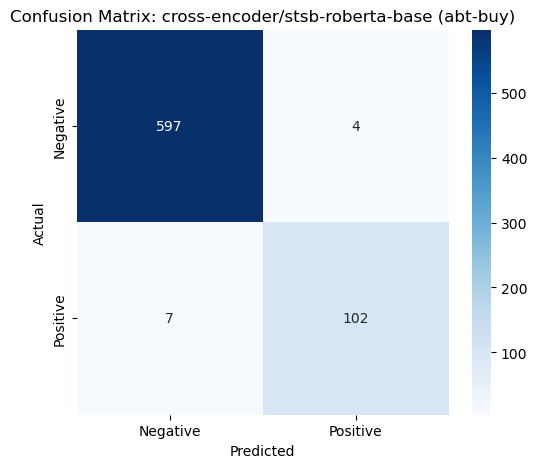

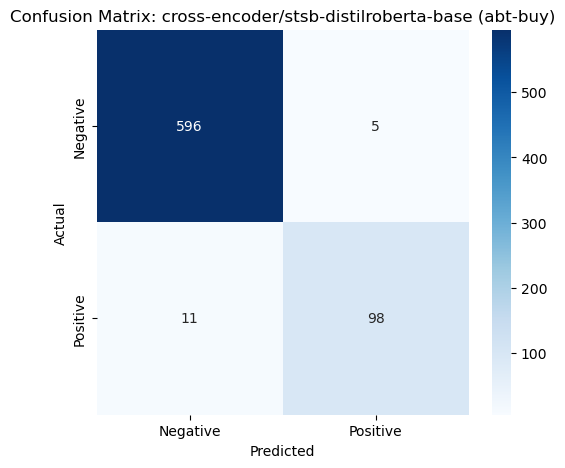

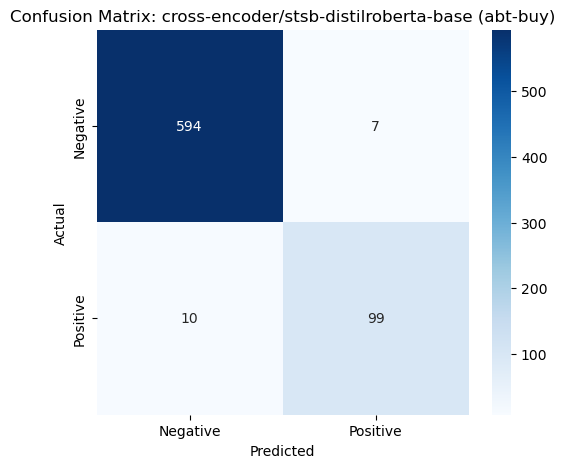

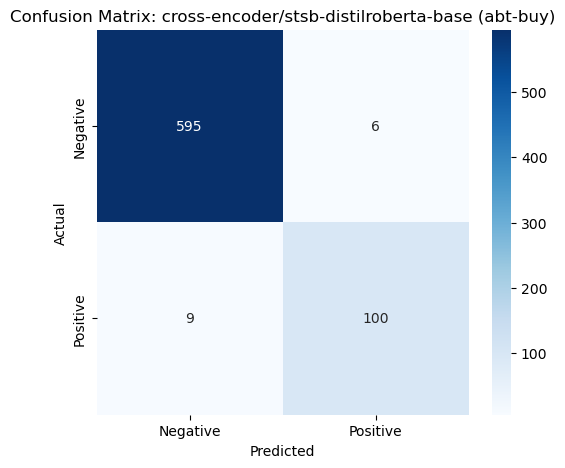

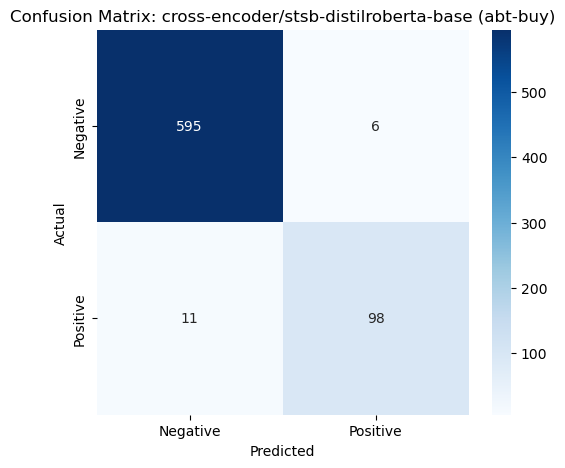

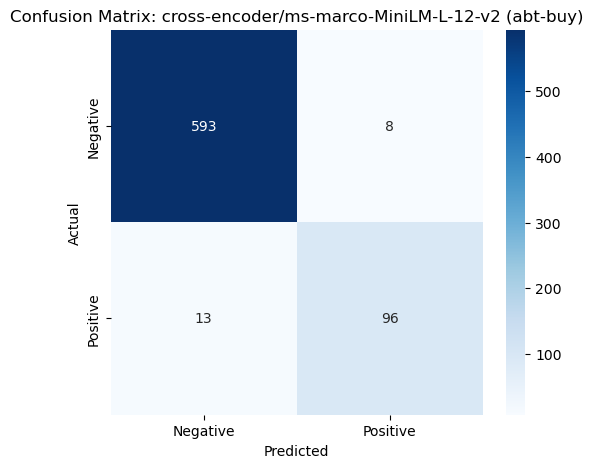

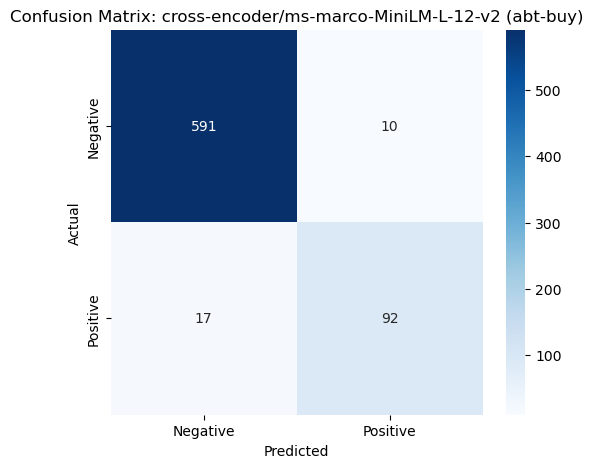

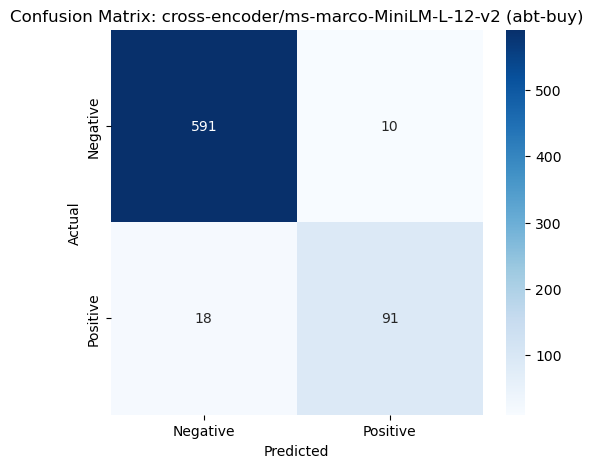

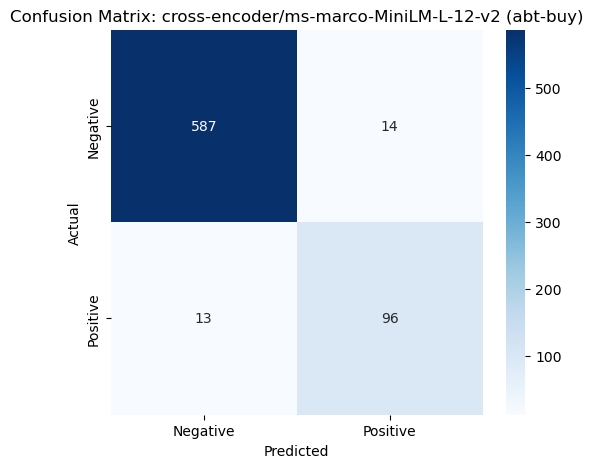

In [9]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

for data_name, models in results_dict.items():
    for model_name, orders in models.items():
        for order_cols, removes in orders.items():
            for remove_col_names, metrics in removes.items():
                cm = np.array(metrics["confusion_matrix"])
                plt.figure(figsize=(6, 5))
                sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
                plt.xlabel("Predicted")
                plt.ylabel("Actual")
                plt.title(f"Confusion Matrix: {model_name} ({data_name})")
                plt.show()

### 3. ROC Curve for Classification Models

<Figure size 1000x600 with 0 Axes>

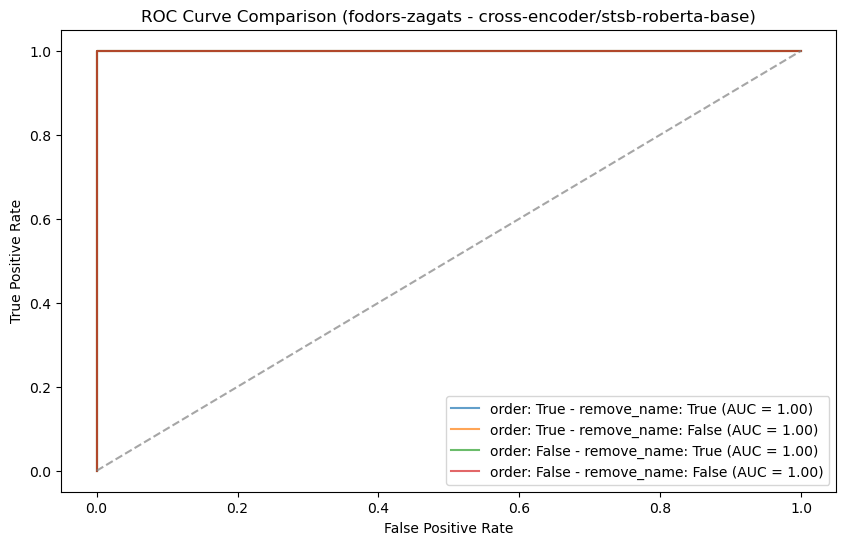

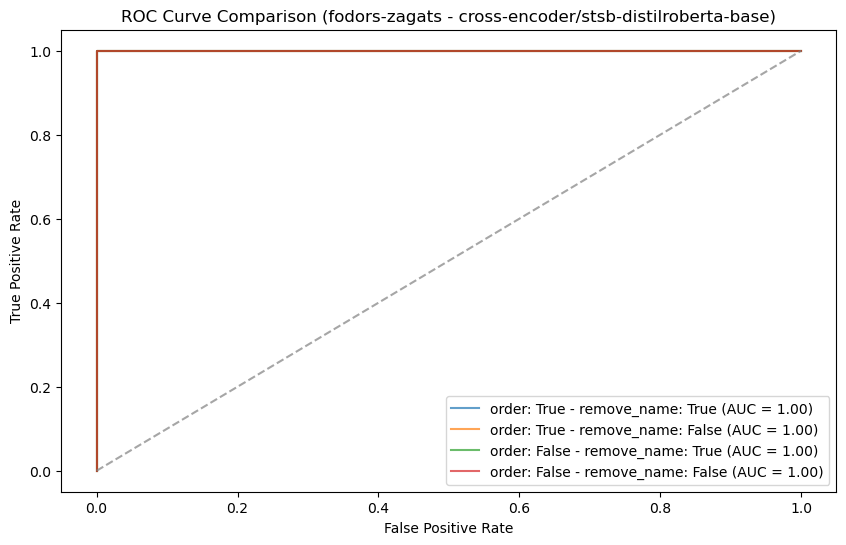

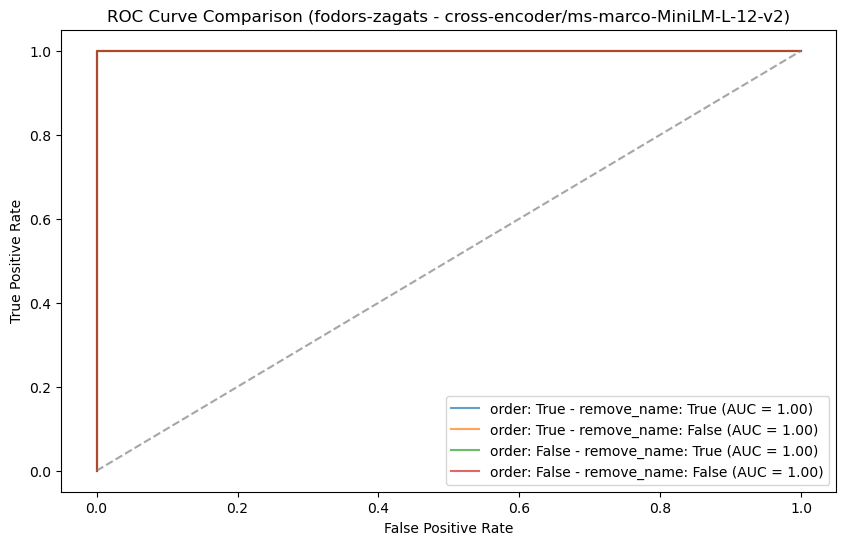

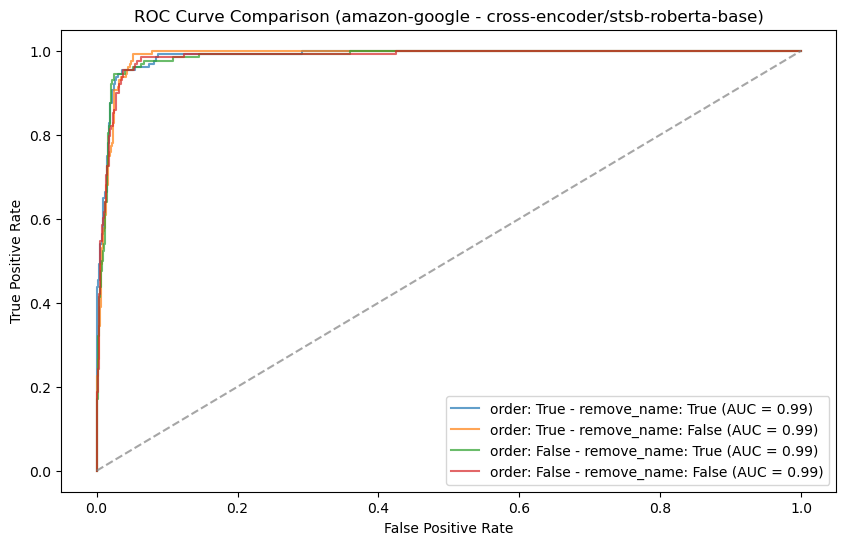

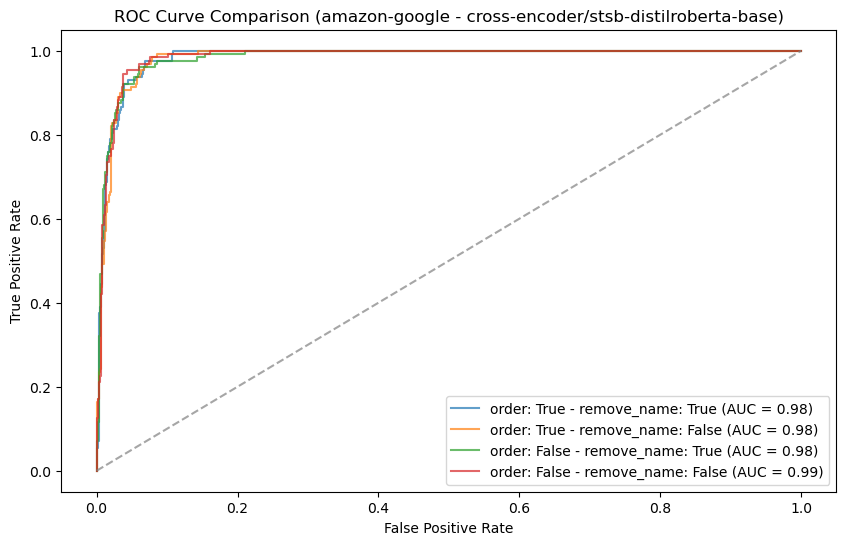

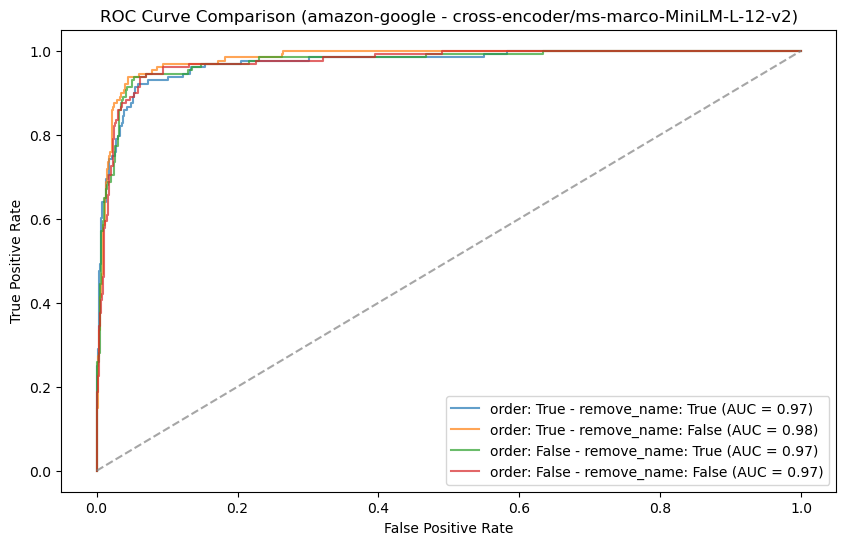

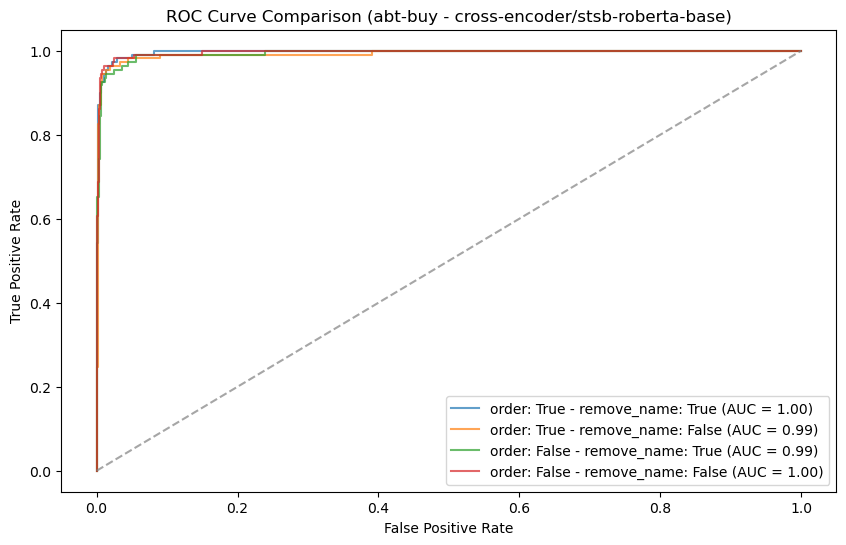

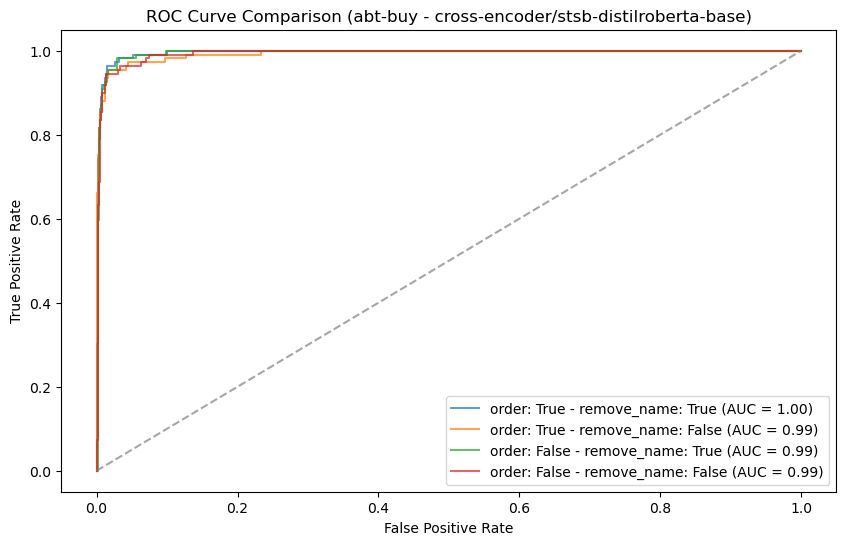

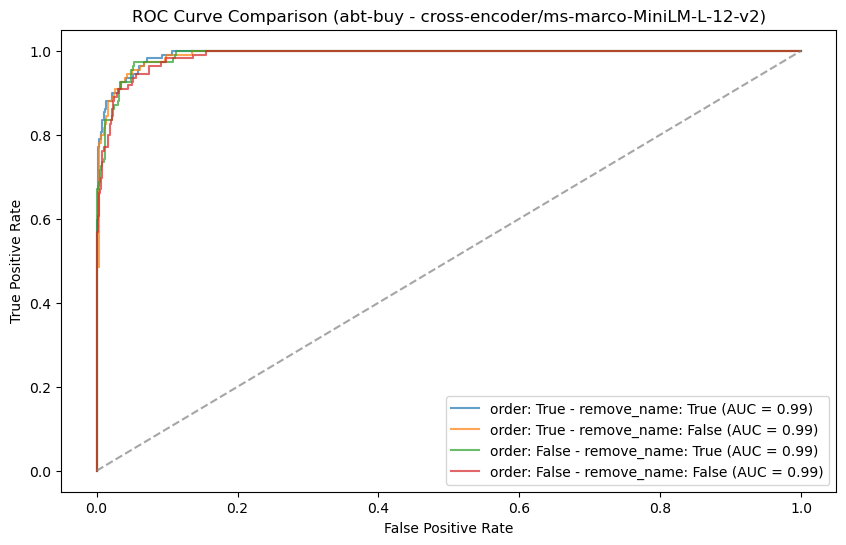

In [10]:
from sklearn.metrics import roc_curve, auc

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

plt.figure(figsize=(10, 6))

for data_name, models in results_dict.items():
    for model_name, orders in models.items():
        plt.figure(figsize=(10, 6))
        for order_cols, removes in orders.items():
            for remove_col_names, metrics in removes.items():
                fpr, tpr, auc_score = metrics["roc_curve"]
                plt.plot(fpr, tpr, label=f"order: {order_cols} - remove_name: {remove_col_names} (AUC = {auc_score:.2f})", alpha=0.7)

        plt.plot([0, 1], [0, 1], linestyle="--", color="gray", alpha=0.7)
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve Comparison ({data_name} - {model_name})")
        plt.legend()
        plt.show()

### 4. Table of Metrics

In [11]:
%pip install ace_tools

Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd

all_results = []

for data_name, models in results_dict.items():
    for model_name, orders in models.items():
        for order_cols, removes in orders.items():
            for remove_col_names, metrics in removes.items():
                all_results.append([
                    data_name, model_name, order_cols, remove_col_names,
                    metrics["precision"], metrics["recall"], metrics["f1"],
                    metrics["roc_auc"], metrics["accuracy"]
                ])

df_results = pd.DataFrame(all_results, columns=["Dataset", "Model", "Order Cols", "Remove Cols",
                                                 "Precision", "Recall", "F1", "ROC AUC", "Accuracy"])

df_results

,Dataset,Model,Order Cols,Remove Cols,Precision,Recall,F1,ROC AUC,Accuracy
0,fodors-zagats,cross-encoder/stsb-roberta-base,True,True,1.000000,1.000000,1.000000,1.000000,1.000000
1,fodors-zagats,cross-encoder/stsb-roberta-base,True,False,1.000000,1.000000,1.000000,1.000000,1.000000
2,fodors-zagats,cross-encoder/stsb-roberta-base,False,True,1.000000,1.000000,1.000000,1.000000,1.000000
3,fodors-zagats,cross-encoder/stsb-roberta-base,False,False,1.000000,1.000000,1.000000,1.000000,1.000000
4,fodors-zagats,cross-encoder/stsb-distilroberta-base,True,True,1.000000,1.000000,1.000000,1.000000,1.000000
5,fodors-zagats,cross-encoder/stsb-distilroberta-base,True,False,1.000000,1.000000,1.000000,1.000000,1.000000
6,fodors-zagats,cross-encoder/stsb-distilroberta-base,False,True,1.000000,1.000000,1.000000,1.000000,1.000000
7,fodors-zagats,cross-encoder/stsb-distilroberta-base,False,False,1.000000,1.000000,1.000000,1.000000,1.000000
8,fodors-zagats,cross-encoder/ms-marco-MiniLM-L-12-v2,True,True,0.916667,1.000000,0.956522,1.000000,0.984848
9,fodors-zagats,cross-encoder/ms-marco-MiniLM-L-12-v2,True,False,1.000000,1.000000,1.000000,1.000000,1.000000
